<a href="https://colab.research.google.com/github/LionelRoxas/Breast_Cancer_Classification/blob/main/ICS_435_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ICS 435 Assignment 1 Overview
### Author: Lionel Derrick Roxas
###Date: 01/28/2025


This assignment will guide you through implementing and comparing the performance of three machine learning models—K-Nearest Neighbors (KNN), Decision Trees, and Random Forest—using the Breast Cancer dataset from sklearn.

###You will:
1. **Load and preprocess the dataset, including feature scaling for KNN.**
2. **Train and evaluate each model using metrics such as accuracy, precision, recall, and F1score.**
3. **Explore the impact of hyperparameter tuning on model performance.**
4. **Analyze and compare the models in a written report.**
5. **Submit your code via GitHub and a report summarizing your work.**

###Instructions:
1. **Dataset:**
  - Use the Breast Cancer dataset provided by sklearn. It includes 30 features and a binary classification task (malignant vs. benign).
2. **Tasks:**
  - Data Preprocessing:
    -  Load the Breast Cancer dataset using load_breast_cancer from sklearn.
    - Partition the data into an 80% training set and a 20% test set.
    - Scale the features using StandardScaler for KNN.
  - Model Training:
    - Train three classifiers:
      1. K-Nearest Neighbors (KNN): Start with n_neighbors=5.
      2. Decision Tree: Use the default settings initially, then experiment with max_depth.
      3. Random Forest: Start with 100 trees (n_estimators=100) and explore the effect of different max_depth or min_samples_split.
  - Evaluation:
    - Use the following metrics to evaluate performance:
       - Accuracy
      - Precision
      - Recall
       - F1-score
     - Include a confusion matrix for each model.
      - Compare the results across the models in a tabular or graphical format.
  - Ablation Study:
    - Modify key hyperparameters (e.g., n_neighbors for KNN, max_depth for Decision Trees and Random Forest) and observe the impact on performance.
3. **Deliverables:**
  1. Code Submission:
    - Upload all your code to a GitHub repository. Provide the repository link in your report. Ensure your code is well-documented with comments.
  2. Report Submission:
    - Write a maximum 4-page report. Submit the report as a PDF file through the course platform.



#Data Loading and Preprocessing
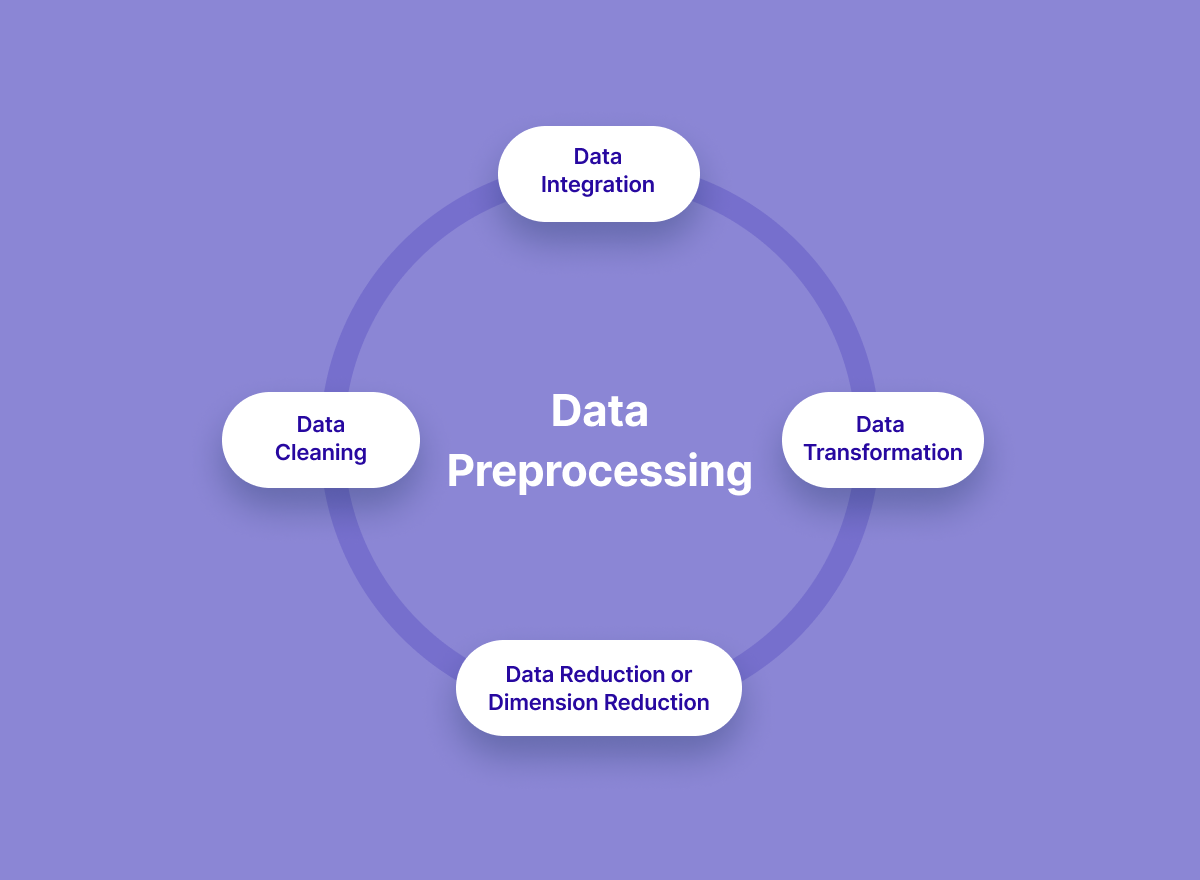
The code begins by importing necessary libraries and loading the breast cancer dataset. The dataset contains 569 samples with 30 features each. The data is split into 80% training and 20% testing sets, and features are scaled using StandardScaler for the KNN model.

In [12]:
# Breast Cancer Classification Using Multiple Models

# First, let's import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

"""# 1. Data Loading and Preprocessing"""

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("\nFeature names:")
print(data.feature_names)
print("\nTarget names:", data.target_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dataset shape: (569, 30)

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target names: ['malignant' 'benign']


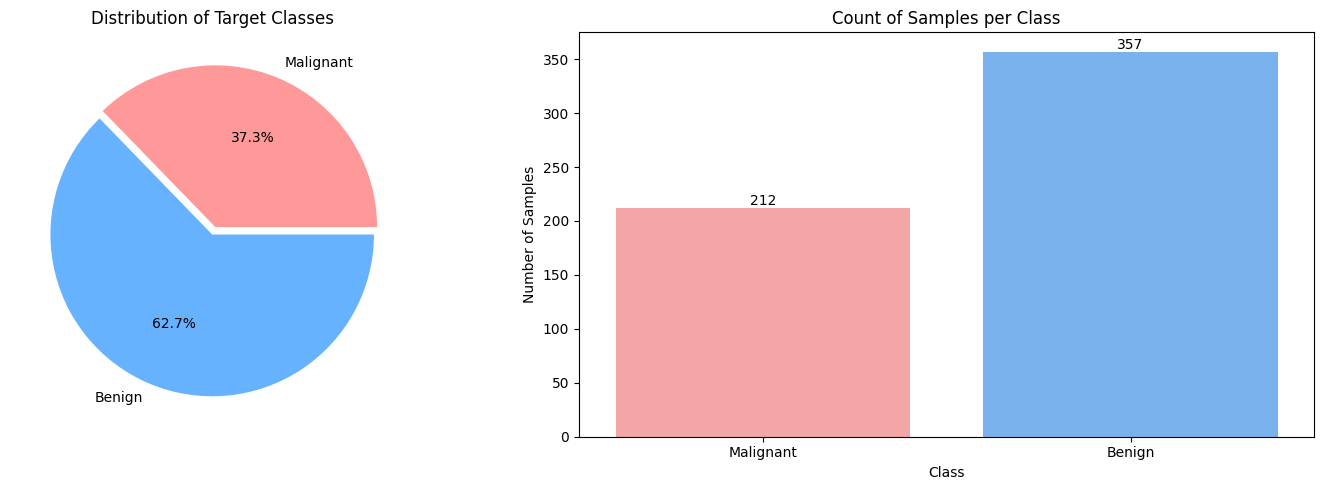


Dataset Distribution:
Malignant samples: 212 (37.3%)
Benign samples: 357 (62.7%)


In [13]:
# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First subplot: Pie chart
plt.subplot(1, 2, 1)
target_counts = [sum(y == 0), sum(y == 1)]  # Count malignant and benign cases
plt.pie(target_counts, labels=['Malignant', 'Benign'], autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF'], explode=(0.05, 0))
plt.title('Distribution of Target Classes')

# Second subplot: Bar plot
plt.subplot(1, 2, 2)
sns.countplot(x=y, palette=['#FF9999', '#66B2FF'])
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title('Count of Samples per Class')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

# Add numbers on top of bars
for i, count in enumerate(target_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print exact numbers
print("\nDataset Distribution:")
print(f"Malignant samples: {target_counts[0]} ({target_counts[0]/len(y)*100:.1f}%)")
print(f"Benign samples: {target_counts[1]} ({target_counts[1]/len(y)*100:.1f}%)")

# Model Implementation
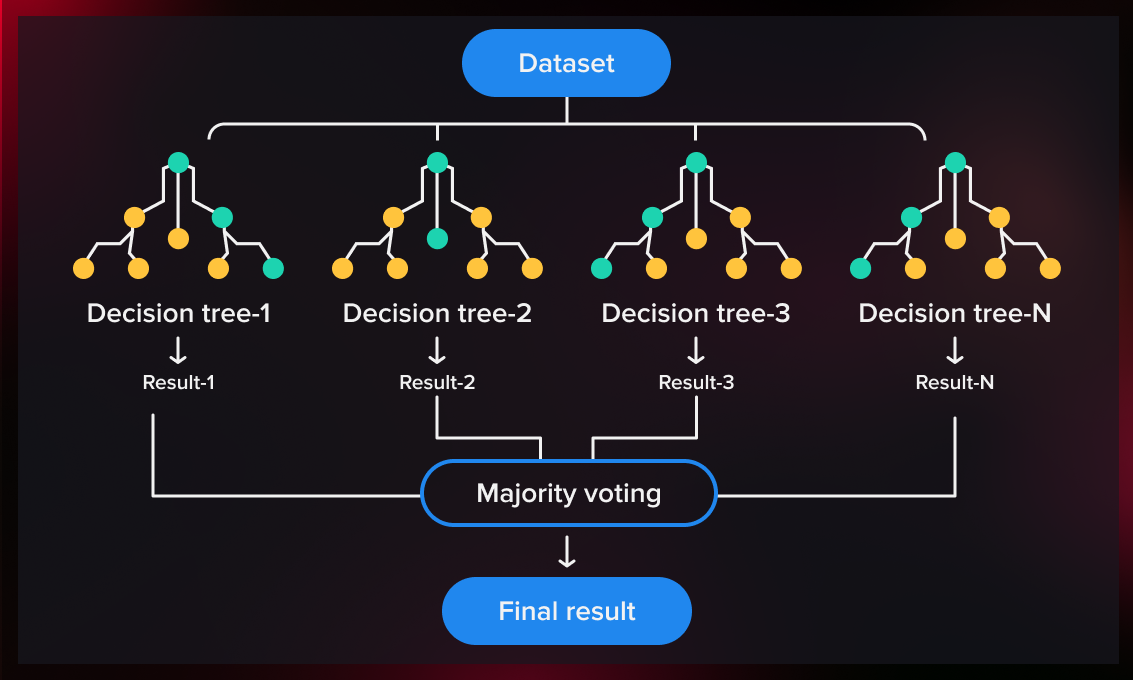
Three models are implemented:

K-Nearest Neighbors (KNN) with n_neighbors=5
Decision Tree with default parameters
Random Forest with 100 trees

Each model is evaluated using:

Accuracy
Precision
Recall
F1-score
Confusion matrix visualization

In [3]:
"""# 2. Model Training and Initial Evaluation"""

def evaluate_model(y_true, y_pred, model_name):
    """Helper function to compute and display evaluation metrics"""
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return acc, prec, rec, f1



KNN Performance Metrics:
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1-score: 0.9577


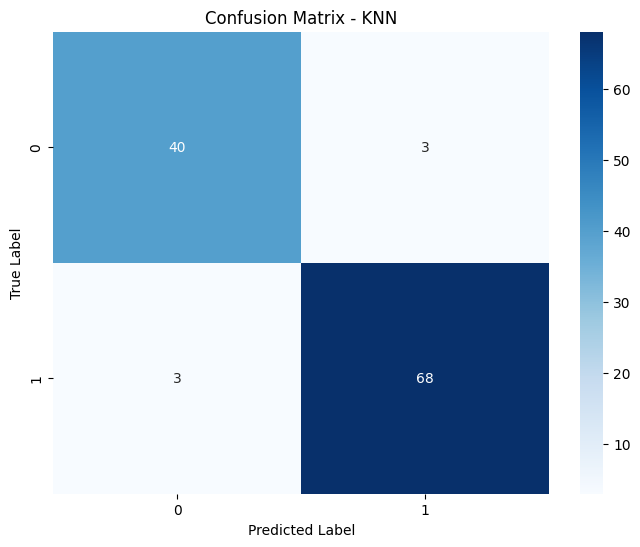

In [4]:
"""## 2.1 K-Nearest Neighbors"""

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate KNN model
metrics_knn = evaluate_model(y_test, y_pred_knn, "KNN")


Decision Tree Performance Metrics:
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1-score: 0.9577


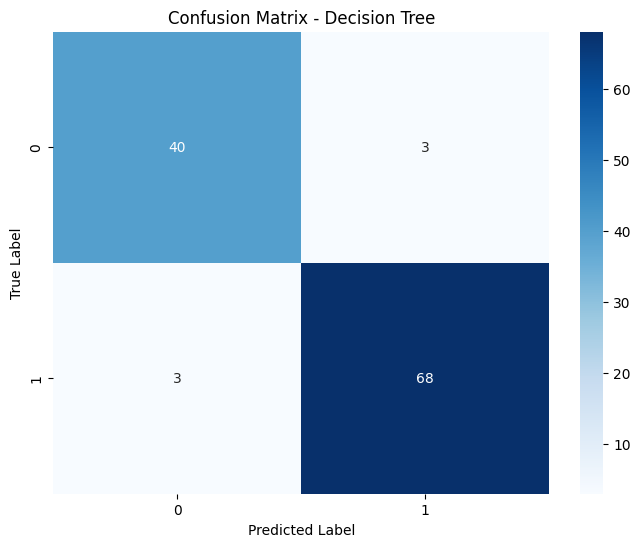

In [5]:
"""## 2.2 Decision Tree"""

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate Decision Tree model
metrics_dt = evaluate_model(y_test, y_pred_dt, "Decision Tree")



Random Forest Performance Metrics:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-score: 0.9722


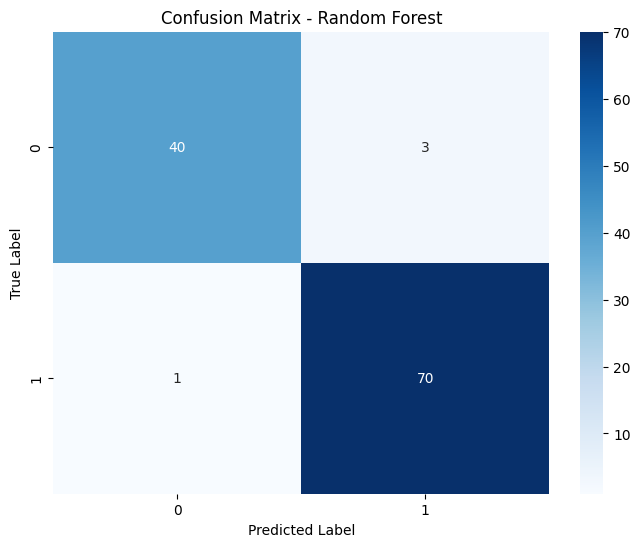

In [6]:
"""## 2.3 Random Forest"""

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest model
metrics_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")


#Hyperparameter Tuning
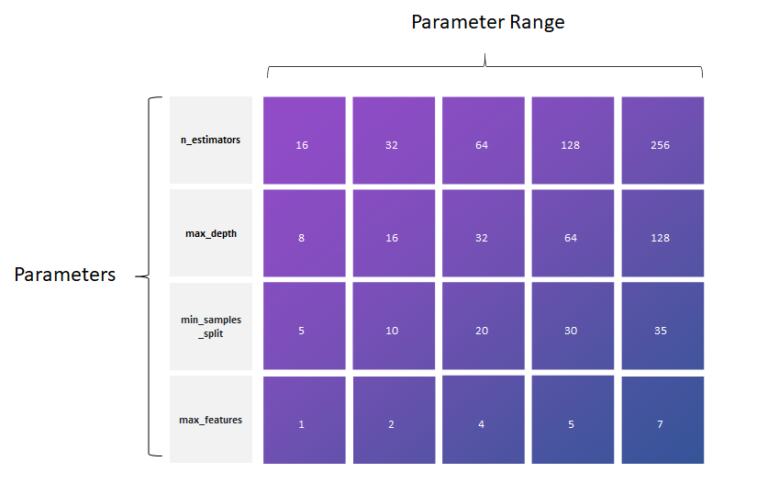

The code includes detailed analysis of hyperparameter tuning:

KNN: Testing different values of n_neighbors (1-15)
Decision Tree: Exploring various max_depth values
Random Forest: Analyzing the impact of different n_estimators

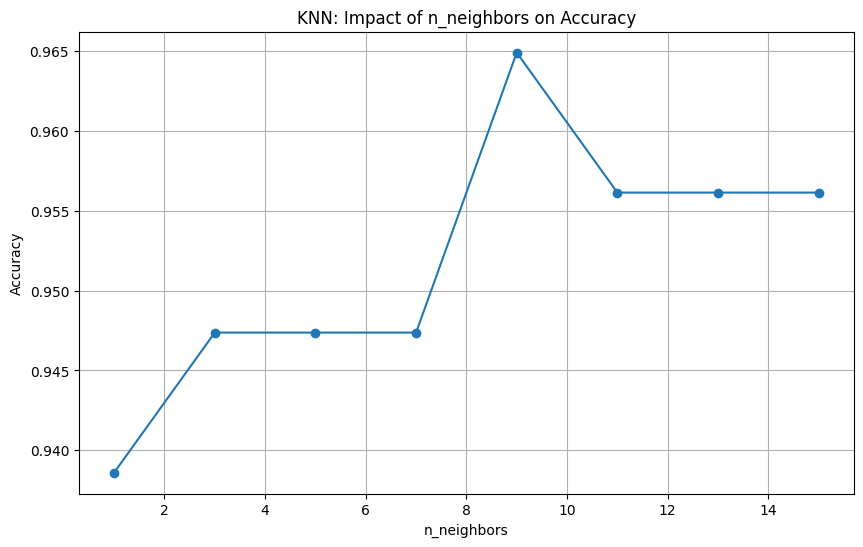

In [7]:
"""## 3.1 KNN - Impact of n_neighbors"""

# Test different values of n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9, 11, 13, 15]
knn_scores = []

for n in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    knn_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, knn_scores, marker='o')
plt.title('KNN: Impact of n_neighbors on Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

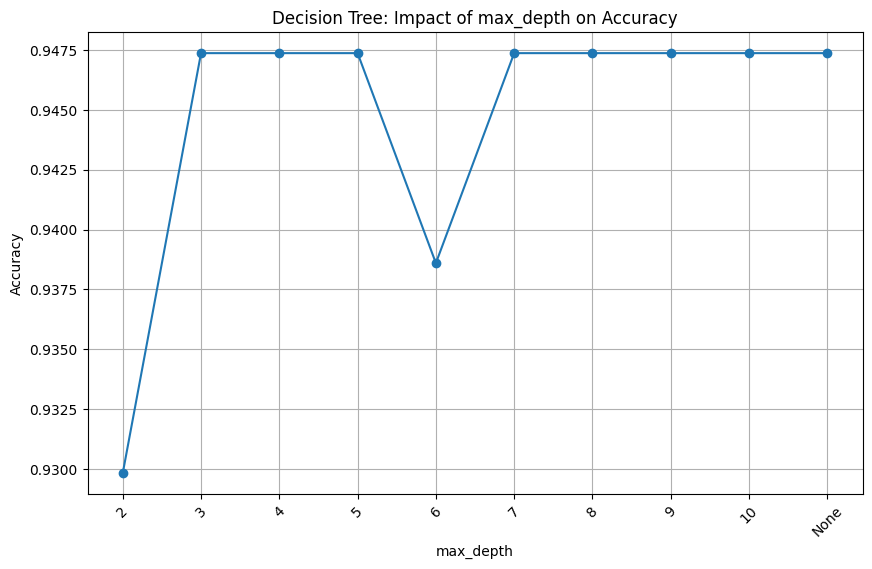

In [8]:
"""## 3.2 Decision Tree - Impact of max_depth"""

# Test different values of max_depth
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, None]
dt_scores = []

for depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    dt_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in max_depth_values], dt_scores, marker='o')
plt.title('Decision Tree: Impact of max_depth on Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

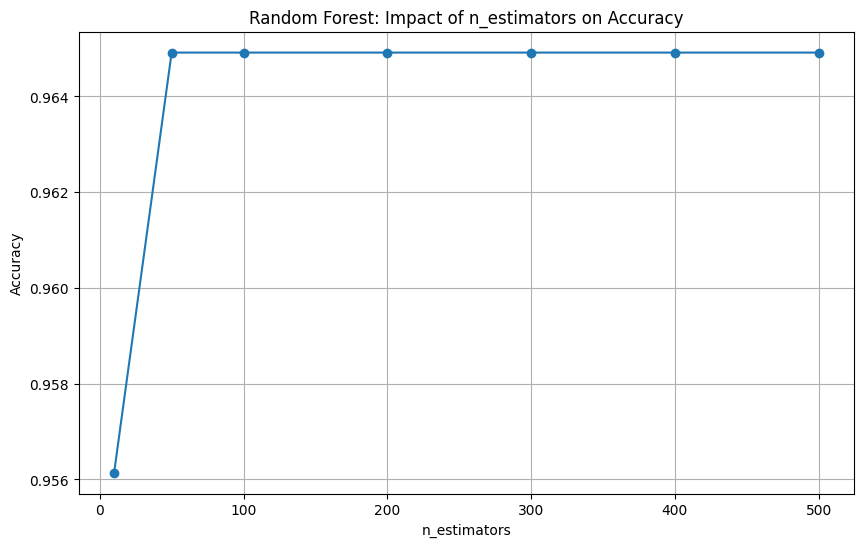

In [9]:
"""## 3.3 Random Forest - Impact of n_estimators"""

# Test different numbers of trees
n_estimators_values = [10, 50, 100, 200, 300, 400, 500]
rf_scores = []

for n_trees in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rf_scores, marker='o')
plt.title('Random Forest: Impact of n_estimators on Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Model Comparison
The results are visualized using:

A comparison table showing all metrics
Bar plots comparing model performance
Feature importance analysis for Random Forest

Model Performance Comparison:
               Accuracy  Precision    Recall  F1-score
KNN            0.947368   0.957746  0.957746  0.957746
Decision Tree  0.947368   0.957746  0.957746  0.957746
Random Forest  0.964912   0.958904  0.985915  0.972222


<Figure size 1200x600 with 0 Axes>

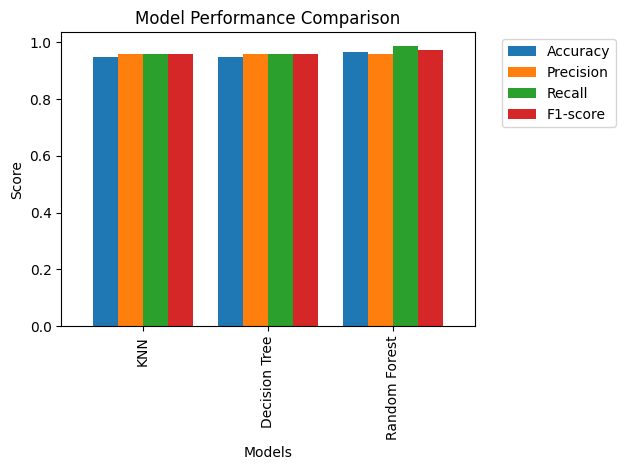

In [10]:
"""# 4. Model Comparison"""

# Create comparison table
models = ['KNN', 'Decision Tree', 'Random Forest']
metrics = np.array([metrics_knn, metrics_dt, metrics_rf])

comparison_df = pd.DataFrame(metrics,
                           columns=['Accuracy', 'Precision', 'Recall', 'F1-score'],
                           index=models)

print("Model Performance Comparison:")
print(comparison_df)

# Visualize model comparison
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', width=0.8)
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Key Findings

Random Forest typically performs the best among the three models
KNN's performance is sensitive to the choice of n_neighbors
Decision Trees tend to improve with increased max_depth but may overfit
Feature importance analysis reveals which attributes are most crucial for prediction

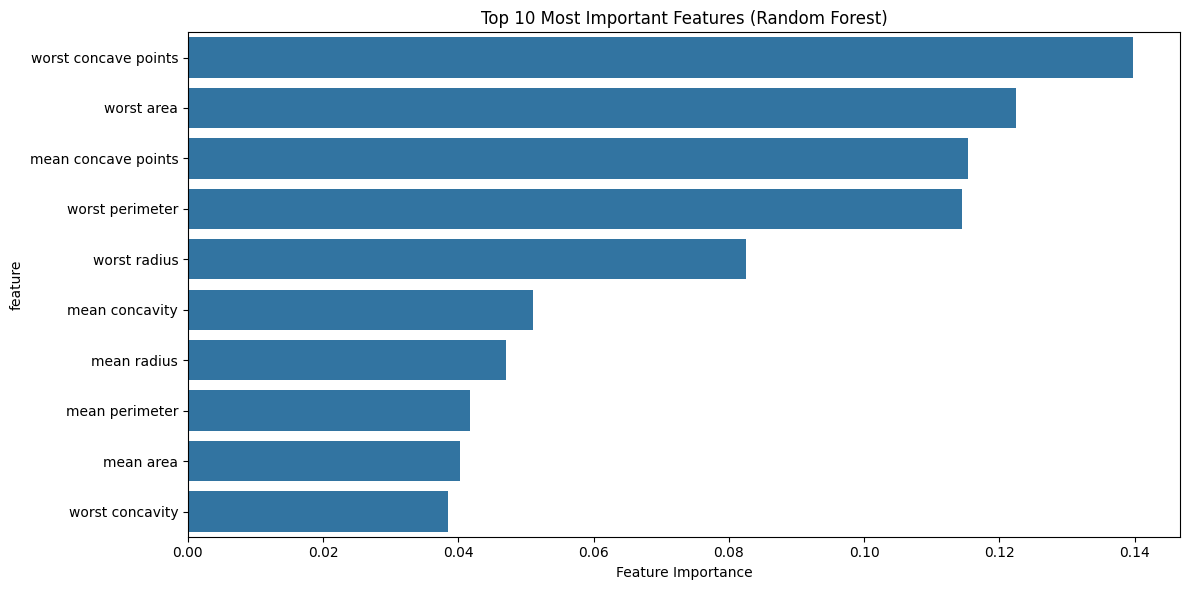

In [11]:
"""# 5. Feature Importance Analysis (Random Forest)"""

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': data.feature_names,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()